## Data

In [1]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import matplotlib.pyplot as plt
import torch

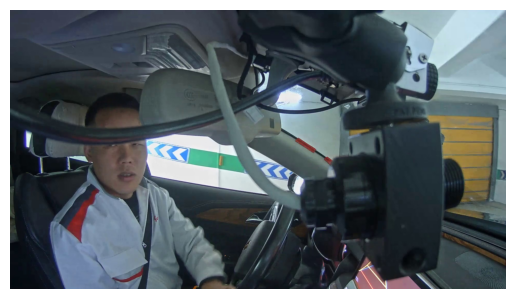

In [4]:
IMAGE_PATH = "/data/shared/ACVPR Group 1 2024/AIDE_small/train/Looking Around/135.jpg"
image = Image.open(IMAGE_PATH)

plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
def predict(img, model_name):
    model = ViTForImageClassification.from_pretrained(model_name, output_attentions=True)
    processor = ViTImageProcessor.from_pretrained(model_name)

    inputs = processor(img, return_tensors="pt")
    outputs = model(**inputs)

    logits = outputs.logits

    predicted_class_idx = logits.argmax(-1).item()
    print("Predicted class:", model.config.id2label[predicted_class_idx])

## Testing Google's ViT

In [8]:
predict(image, 'google/vit-base-patch16-224')

Predicted class: oxygen mask


## Testing Driver Drowsiness Detection model, fine-tuned from Google's ViT

In [9]:
predict(image, "chbh7051/driver-drowsiness-detection")

Predicted class: notdrowsy


## Testing Driver Behaviour Detection model, fine-tuned from Google's ViT

In [14]:
# import os
# base = "/data/shared/ACVPR Group 1 2024/AIDE_small/train/"
# for label in os.listdir(base):
#         if not os.path.isfile(label):
#             file = os.listdir(os.path.join(base,label))[150]
#             file_path = os.path.join(base,os.path.join(label,file))
#             image = Image.open(file_path)
# 
#             plt.imshow(image)
#             plt.axis('off')
#             plt.show()
#             print("Image path:", file_path)
#             print("True class:", label)
predict(image, "/data/shared/ACVPR Group 1 2024/vit-aide")

Predicted class: Looking Around
